# Conjunto de datos olimpicos

El conjunto de datos de los Juegos Olímpicos contiene información detallada sobre los eventos y los atletas que han participado en los Juegos Olímpicos modernos. Esta base de datos se centra en diversos aspectos de los Juegos Olímpicos, tales como:

Participación de Atletas: Incluye información sobre los atletas, como su nombre, edad, sexo, y el país al que representan. También contiene detalles sobre los eventos en los que participaron, el año y la edición específica de los Juegos (Verano o Invierno).

Resultados de los Eventos: Los datos registran las medallas ganadas (oro, plata, bronce) por los atletas en las distintas disciplinas, proporcionando una visión general del rendimiento de los diferentes países en los Juegos.

Información Histórica: La base de datos abarca múltiples ediciones de los Juegos Olímpicos, permitiendo análisis a lo largo del tiempo para identificar tendencias y patrones históricos en el desempeño de los países y la evolución de los deportes.

El conjunto de datos NOC (National Olympic Committees) incluye las regiones correspondientes a cada código NOC, facilitando la identificación y agrupación de datos por país o región.

Usos Potenciales:
Este conjunto de datos es ideal para realizar análisis históricos del rendimiento de los países en los Juegos Olímpicos, explorando factores como la edad y el género de los atletas, la distribución de medallas, y comparaciones entre los Juegos de Verano e Invierno.

In [1]:
#Cargar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar los archivos CSV en DataFrames
olympics_df = pd.read_csv('dataset_olympics.csv')
noc_region_df = pd.read_csv('noc_region.csv')

# Mostrar las primeras filas de los DataFrames para verificar que se han cargado correctamente
print("Primeras filas del conjunto de datos olímpicos:")
print(olympics_df.head())

print("\nPrimeras filas del conjunto de datos de regiones NOC:")
print(noc_region_df.head())


Primeras filas del conjunto de datos olímpicos:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extr

## Aanalisis basico  de la estructura de los datos

In [4]:
# Dimensiones de los DataFrames
print(f"\nDimensiones del conjunto de datos olímpicos: {olympics_df.shape}")
print(f"Dimensiones del conjunto de datos de regiones NOC: {noc_region_df.shape}")






Dimensiones del conjunto de datos olímpicos: (70000, 15)
Dimensiones del conjunto de datos de regiones NOC: (230, 3)


In [5]:
# Información sobre los tipos de datos y valores nulos
print("\nInformación del conjunto de datos olímpicos:")
print(olympics_df.info())



Información del conjunto de datos olímpicos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB
None


In [6]:
print("\nInformación del conjunto de datos de regiones NOC:")
print(noc_region_df.info())




Información del conjunto de datos de regiones NOC:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noc_region  230 non-null    object
 1   reg         227 non-null    object
 2   notes       21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB
None


In [7]:
# Descripción estadística básica
print("\nDescripción estadística del conjunto de datos olímpicos:")
print(olympics_df.describe())


Descripción estadística del conjunto de datos olímpicos:
                 ID           Age        Height        Weight          Year
count  70000.000000  67268.000000  53746.000000  52899.000000  70000.000000
mean   18081.846986     25.644645    175.505303     70.900216   1977.766457
std    10235.613253      6.485239     10.384203     14.217489     30.103306
min        1.000000     11.000000    127.000000     25.000000   1896.000000
25%     9325.750000     21.000000    168.000000     61.000000   1960.000000
50%    18032.000000     25.000000    175.000000     70.000000   1984.000000
75%    26978.000000     28.000000    183.000000     79.000000   2002.000000
max    35658.000000     88.000000    223.000000    214.000000   2016.000000


## Comprobar valores nulos y complicados

In [8]:
# Comprobar valores nulos
print("\nValores nulos en el conjunto de datos olímpicos:")
print(olympics_df.isnull().sum())

print("\nValores nulos en el conjunto de datos de regiones NOC:")
print(noc_region_df.isnull().sum())





Valores nulos en el conjunto de datos olímpicos:
ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

Valores nulos en el conjunto de datos de regiones NOC:
noc_region      0
reg             3
notes         209
dtype: int64


In [9]:
# Comprobar valores duplicados
print("\nValores duplicados en el conjunto de datos olímpicos:")
print(olympics_df.duplicated().sum())

print("\nValores duplicados en el conjunto de datos de regiones NOC:")
print(noc_region_df.duplicated().sum())


Valores duplicados en el conjunto de datos olímpicos:
383

Valores duplicados en el conjunto de datos de regiones NOC:
0


In [11]:
# Renombrar la columna 'noc_region' a 'NOC' en el DataFrame de noc_region_df
noc_region_df.rename(columns={'noc_region': 'NOC'}, inplace=True)

merged_df = pd.merge(olympics_df, noc_region_df, on='NOC', how='left')

# Verificar las primeras filas del conjunto de datos combinado
print("\nPrimeras filas del conjunto de datos combinado:")
print(merged_df.head())



Primeras filas del conjunto de datos combinado:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal          reg notes  
0       Basketball Men's Basketball   NaN     

## Unir los conjuntos de datos

In [12]:
# Unir los dos DataFrames utilizando la columna 'NOC' como clave
merged_df = pd.merge(olympics_df, noc_region_df, on='NOC', how='left')

# Verificar las primeras filas del conjunto de datos combinado
print("\nPrimeras filas del conjunto de datos combinado:")
print(merged_df.head())



Primeras filas del conjunto de datos combinado:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal          reg notes  
0       Basketball Men's Basketball   NaN     

## Visualizacion de los datos

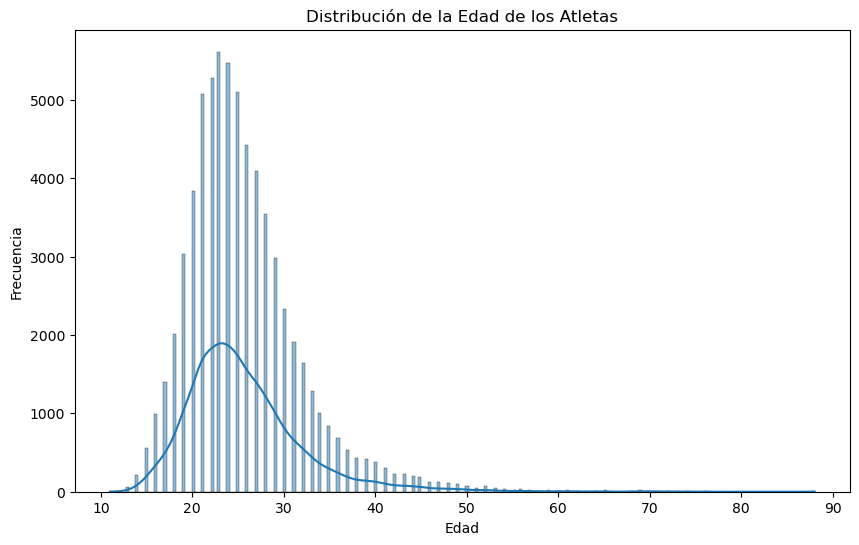

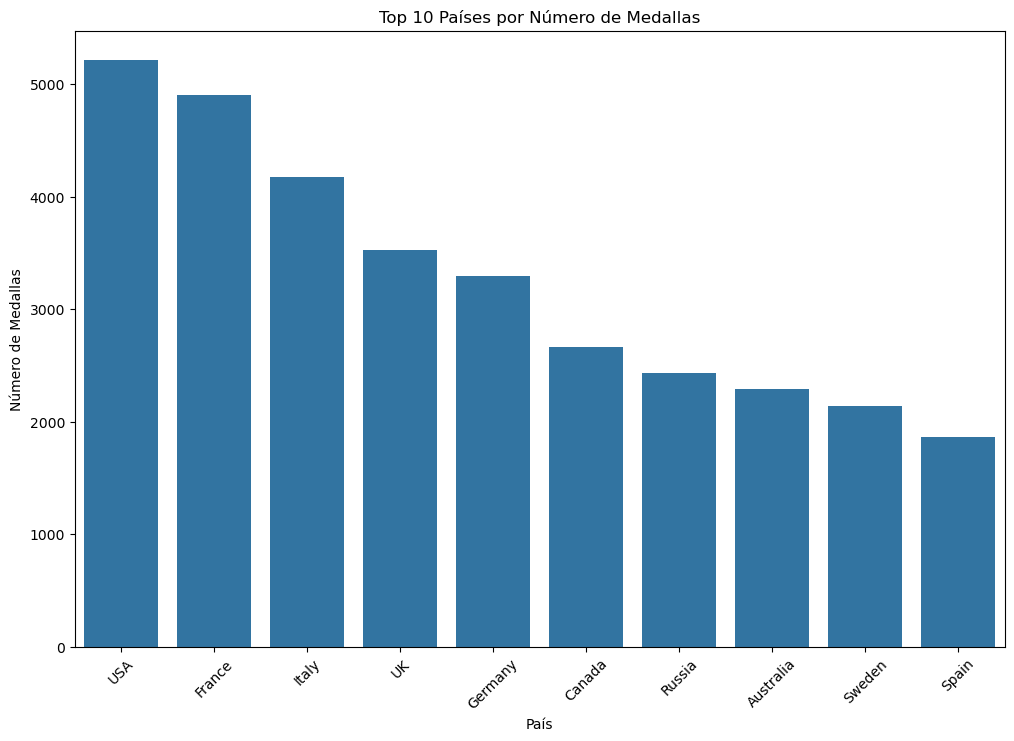

In [14]:
# Histograma de la distribución de la edad de los atletas
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Age'], kde=True)
plt.title('Distribución de la Edad de los Atletas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras de las medallas por país
plt.figure(figsize=(12, 8))
medals_by_country = merged_df['reg'].value_counts().head(10)
sns.barplot(x=medals_by_country.index, y=medals_by_country.values)
plt.title('Top 10 Países por Número de Medallas')
plt.xlabel('País')
plt.ylabel('Número de Medallas')
plt.xticks(rotation=45)
plt.show()


## Análisis de la Evolución de Medallas a lo Largo del Tiempo


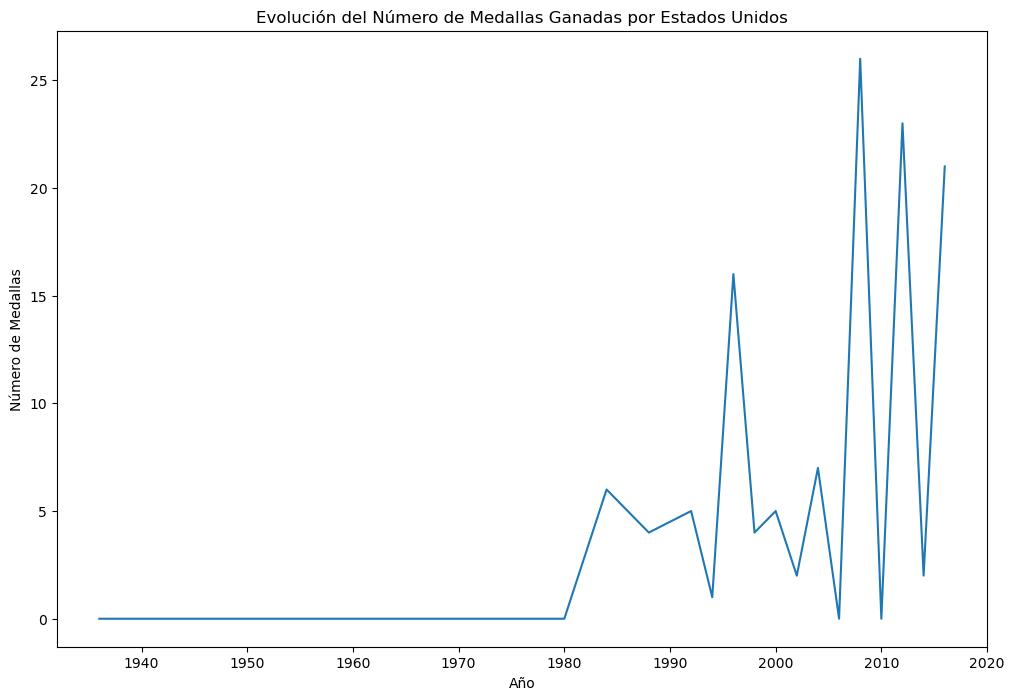

In [32]:
# Filtrar el conjunto de datos para un país específico, por ejemplo, China
china_medals = merged_df[merged_df['reg'] == 'China']

# Contar el número de medallas por año
medals_per_year = china_medals.groupby('Year')['Medal'].count()

# Crear un gráfico de líneas para mostrar la tendencia
plt.figure(figsize=(12, 8))
medals_per_year.plot(kind='line')
plt.title('Evolución del Número de Medallas Ganadas por Estados Unidos')
plt.xlabel('Año')
plt.ylabel('Número de Medallas')
plt.show()


## Analisis de la participacion por genero

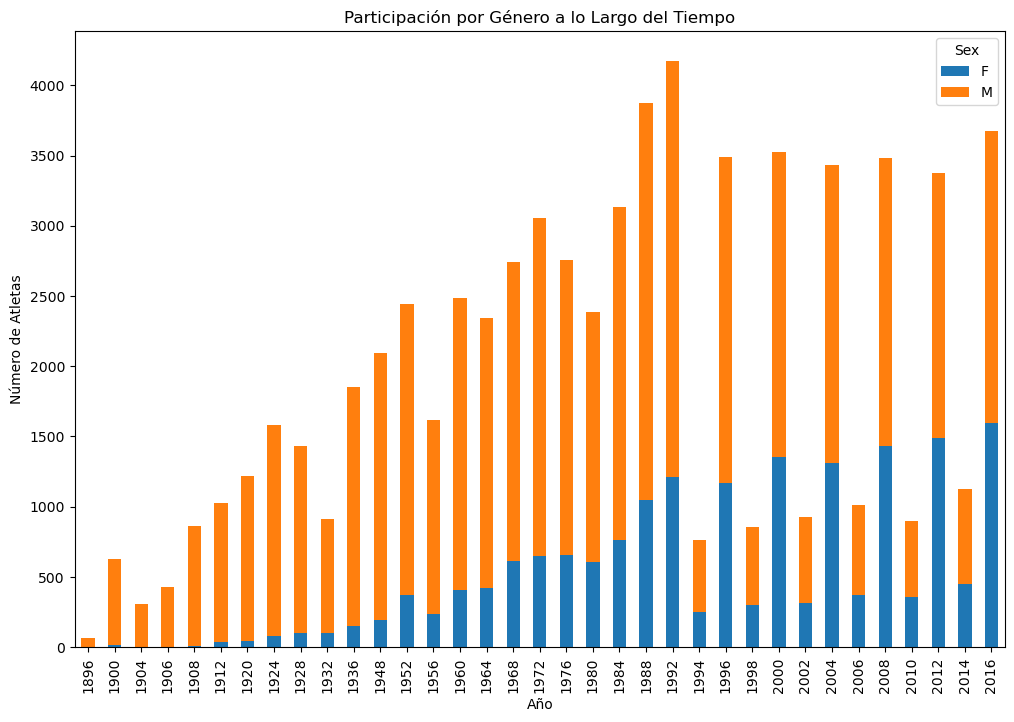

In [17]:
# Contar el número de atletas por género y año
gender_participation = merged_df.groupby(['Year', 'Sex']).size().unstack()


gender_participation.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Participación por Género a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Atletas')
plt.show()


## Análisis de la Distribución de la Altura y Peso

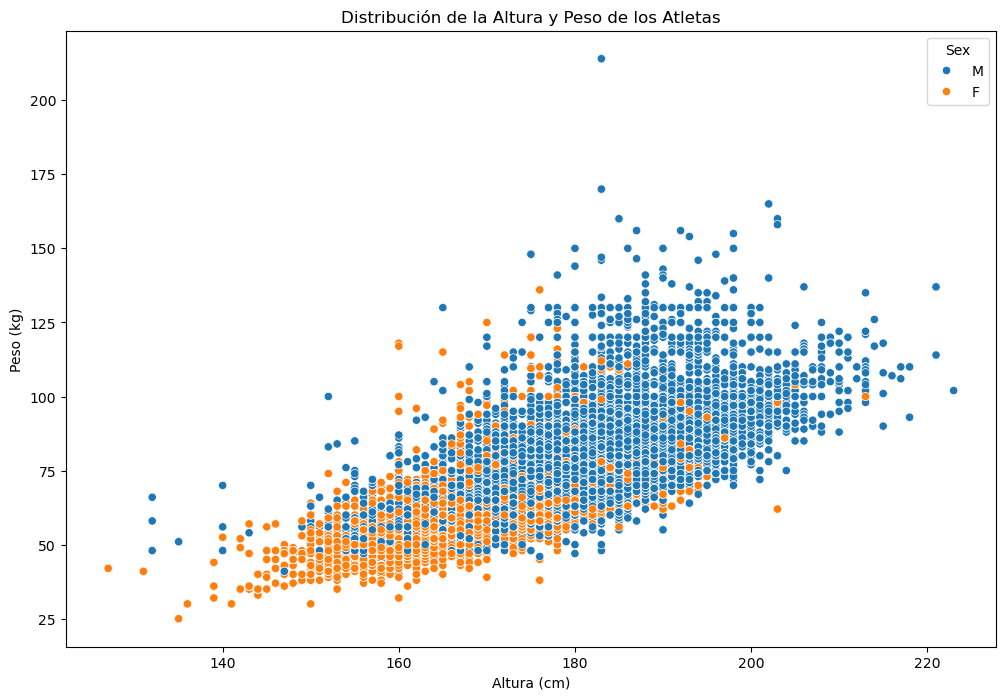

In [18]:
# Crear un gráfico de dispersión de altura vs peso
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_df, x='Height', y='Weight', hue='Sex')
plt.title('Distribución de la Altura y Peso de los Atletas')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()


## Analisis de deportes dominantes

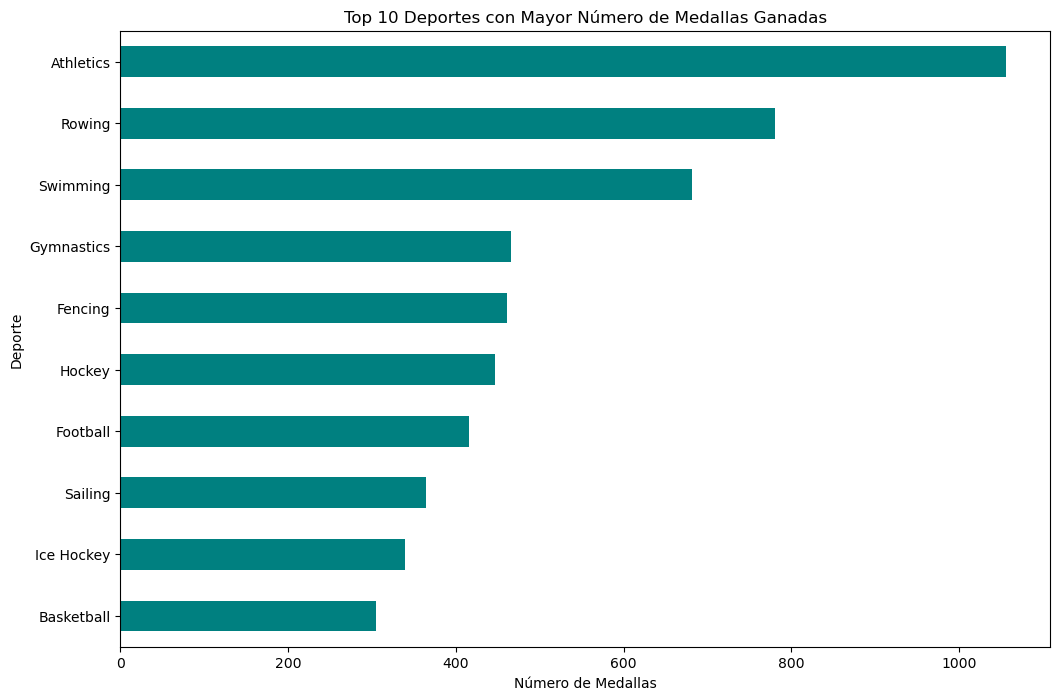

In [31]:
# Contar el número de medallas por deporte
sport_medals = merged_df.groupby('Sport')['Medal'].count().sort_values(ascending=True).tail(10)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sport_medals.plot(kind='barh', color='teal')
plt.title('Top 10 Deportes con Mayor Número de Medallas Ganadas')
plt.xlabel('Número de Medallas')
plt.ylabel('Deporte')
plt.show()


## Analisis de los mejores atletas

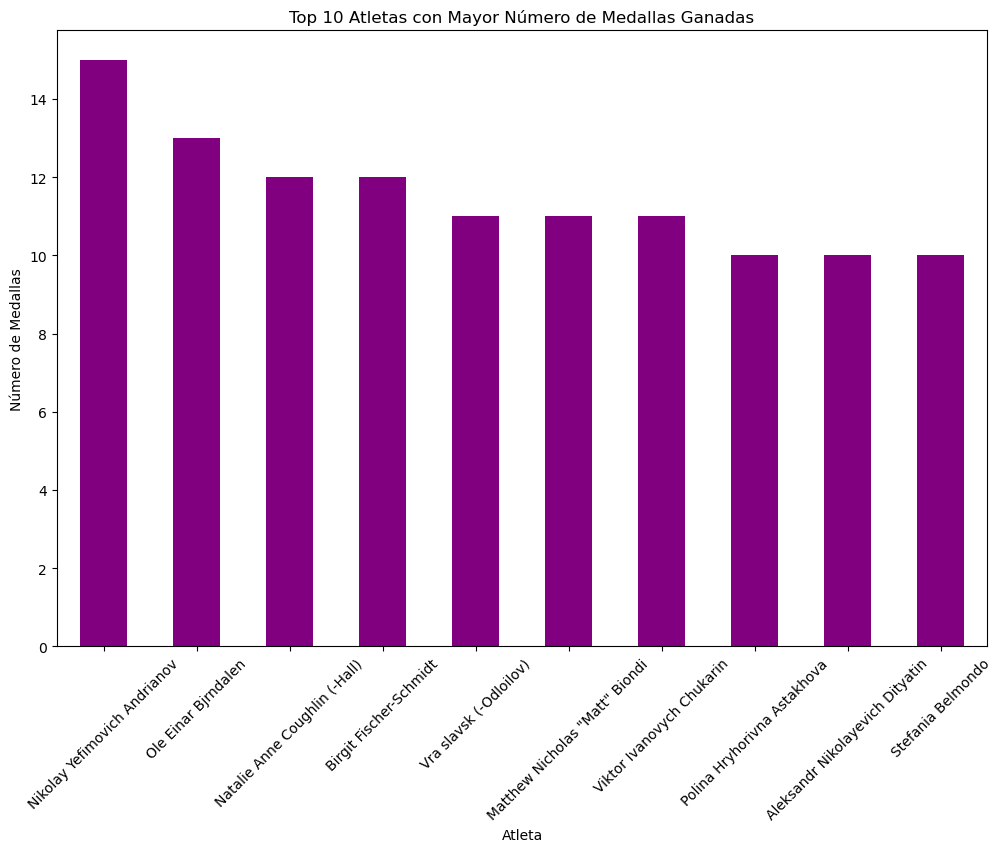

In [30]:
# Contar el número de medallas por atleta
top_athletes = merged_df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
top_athletes.plot(kind='bar', color='purple')
plt.title('Top 10 Atletas con Mayor Número de Medallas Ganadas')
plt.xlabel('Atleta')
plt.ylabel('Número de Medallas')
plt.xticks(rotation=45)
plt.show()


## Relacion entre Edad y Medallas ganadas

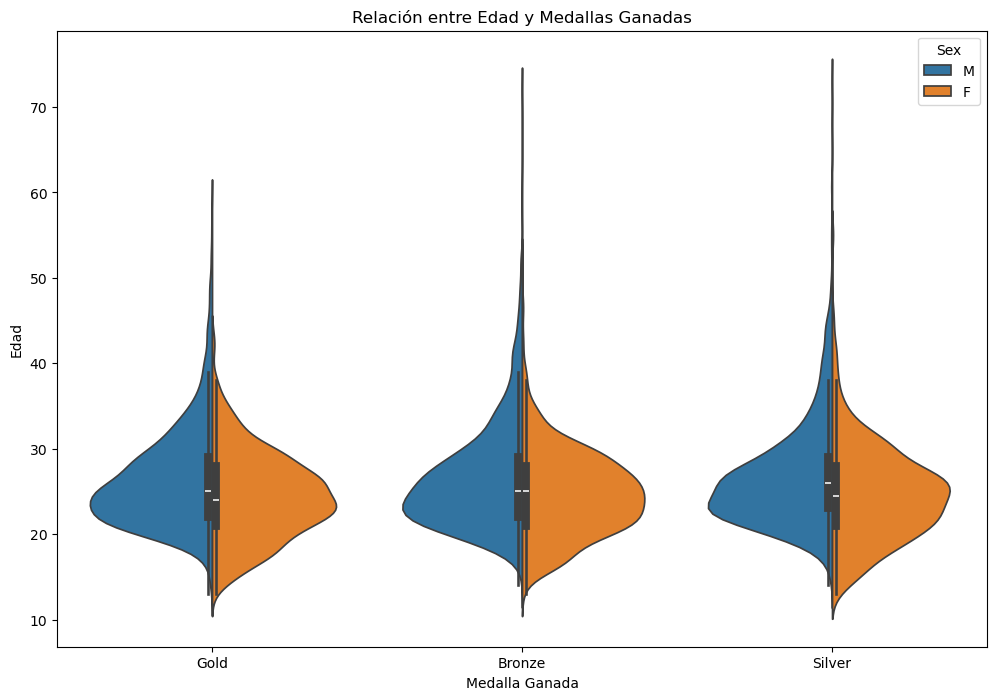

In [29]:
# Crear un gráfico de violín para mostrar la relación entre la edad y las medallas ganadas
plt.figure(figsize=(12, 8))
sns.violinplot(x='Medal', y='Age', data=merged_df, hue='Sex', split=True)
plt.title('Relación entre Edad y Medallas Ganadas')
plt.xlabel('Medalla Ganada')
plt.ylabel('Edad')
plt.show()
